# Box and Whisker Plots

### Project Intentions

* Brief history of Box Plots
* Explain how to read box and whisker plots, by examining skewed datasets and real world data. 
* Use boxplots, and variations of boxplots to graphically display data
* Investigate alternatives that address the limitations of box plots

### Libraries

In [2]:
import numpy as np # For numerical calculations
import matplotlib.pyplot as plt #For graphical representations
import seaborn as sns #For graphical representations
import pandas as pd #For data manipulation
import scipy.stats as ss # For calculating skew
%matplotlib inline

### Definitions

Before we look at box plots, it's important to know a little about the statistical measures a box plot represents. 

* **Maximum Value** is the largest numerical value in a data set. 
* **Minimum Value** is the smallest numerical value in a data set. 
* **The Range** is the difference between the Max and Min values.
* **Outlier** is a data point that is noticeably larger or smaller than other data points in the set. 
* **Median** (Q2) is the middle value when data is ordered. It is a useful measure of central tendency, when the set contains extreme values or outliers. 
* **Lower Quartile** (Q1) is the median of the lower half of the data set. 
* **Upper Quartile** (Q3) is the median of the upper half of the data set. 
* **Interquartile Range** is the difference between the Q3 and Q1 values. It is a measure of spread which can be useful in sets containing outliers. 

A basic boxplot, is a graphical representation of these statistics. 

  
![Basic boxplot diagram](https://github.com/MarionMcG/Images/blob/master/boxplot_basic.JPG?raw=true)
1. Minimum value
2. Lower Quartile (Q1)
3. Median(Q2)
4. Upper Quartile(Q3)
5. Maximum value

In a box plot the length of the whiskers, the lines extending from the box, is equal to the range.

The length of the box is equal to the Interquartile Range, and 50% of my data is contained within the box.

### History of the Boxplot

The boxplot was intially devised by John Tukey in the 1970s. It was an easy way to graphically represent summary statistics, and it can be easily completed by hand. Even today, at GCSE level, Maths students in England use cumulative frequency curves to quickly calculate statistics and construct a boxplot by hand. The boxplot has been widely adopted in the last 50 years, partly because of the ease with which it can be drawn by hand.

![John W. Tukey](https://upload.wikimedia.org/wikipedia/en/e/e9/John_Tukey.jpg)

### Usefulness
- Ideal for looking at the distribution of data.
- Box plots allow for quick comparison between variables in datasets.
- Quick identification of the five summary statistics in a large dataset.
- Box plots are similar to histograms, but the shape of a histogram can be infleunced by the number of bins you choose. You don't have this problem with box plots. 

### Plotting with Box Plots

There are several packages available that allow us to plot large amounts of data on box plots. For the purposes of this investigation I am going to focus on using Seaborn and Matplotlib, two Python libraries. 

The use of computers also allow for graphical representations that better reflect the spread of data. One example of this, is the ability to plot box plots with and without ouliers, and the ability to set criteria for identifying outliers.

#### Standard Normal Distribution with and without Outliers

Both Matplotlib and Seaborn use a proportion of the Interquartile range to determine if values are outliers. 

In both libraries, any value below **Q1 - 1.5(IQR)** or above  **Q3 + 1.5(IQR)** is considered to be an outlier. 

The default for both libraries is to show these outliers as points, outside the range of the whiskers. In both programs the 'whis', or proportion of the IQR range, can be changed if needed. You can also chose not to show outliers.

In [3]:
#Generate 1000 numbers from Standard Normal Dist
norm = np.random.standard_normal(1000)

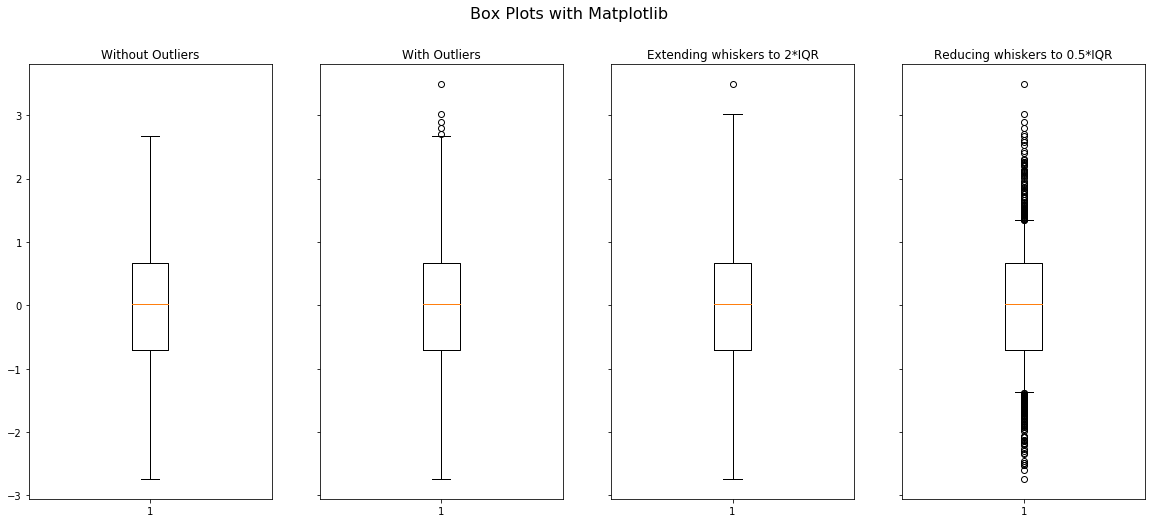

In [49]:
#Plot figure, with one row and 3 cols
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(20,8))
f.suptitle('Box Plots with Matplotlib', fontsize = 16)
#Subplot 1 - without outliers
ax1.set_title('Without Outliers')
ax1.boxplot(norm, showcaps = True, showfliers= False)
#Suplot 2 - with outliers
ax2.set_title('With Outliers')
ax2.boxplot(norm, showcaps = True)
#Subplot 3 - extend whis to 2, so there are technically no outliers
ax3.set_title('Extending whiskers to 2*IQR')
ax3.boxplot(norm, showcaps = True, whis=2);
#Subplot 3 - extend whis to 0.5, so there are technically no outliers
ax4.set_title('Reducing whiskers to 0.5*IQR')
ax4.boxplot(norm, showcaps = True, whis=0.5);

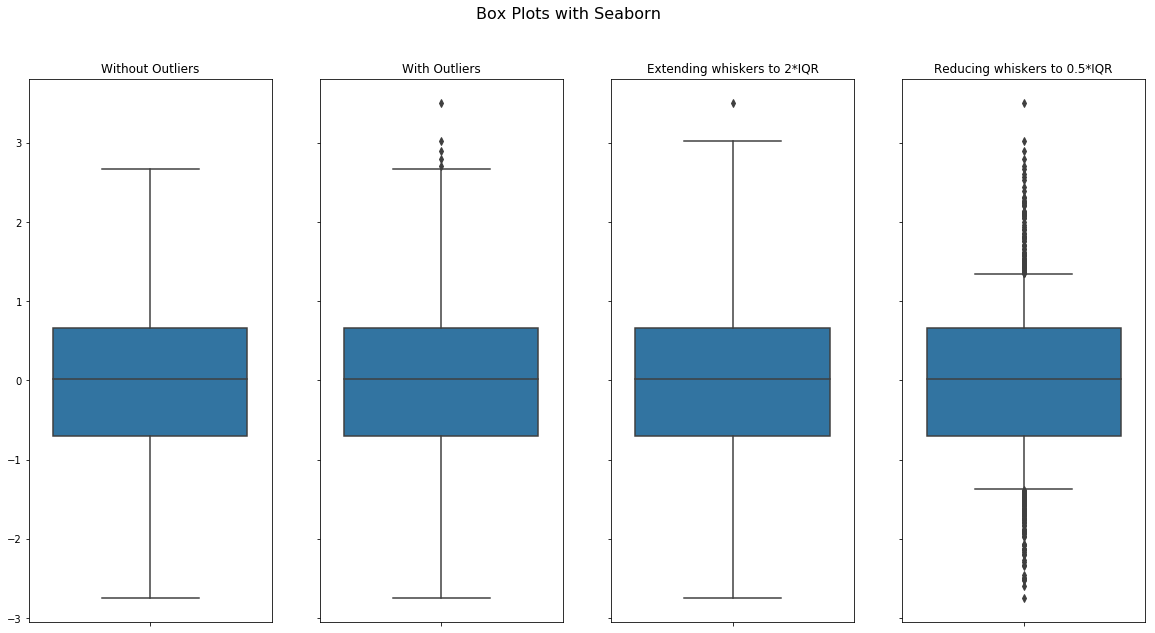

In [50]:
#Plot figure, with one row and 3 cols
f, axes = plt.subplots(1, 4, sharey = True,figsize=(20,10))
f.suptitle('Box Plots with Seaborn', fontsize = 16)
ax1 = f.axes[0]
ax2 = f.axes[1]
ax3 = f.axes[2]
ax4 = f.axes[3]
#Subtitles
ax1.set_title('Without Outliers')
ax2.set_title('With Outliers')
ax3.set_title('Extending whiskers to 2*IQR')
ax4.set_title('Reducing whiskers to 0.5*IQR')
#Subplots
sns.boxplot(norm, showfliers = False, ax = axes[0],  orient = 'v');
sns.boxplot(norm, ax=axes[1],  orient = 'v');
sns.boxplot(norm, ax=axes[2],  orient = 'v', whis = 2);
sns.boxplot(norm, ax=axes[3], showcaps = True, orient = 'v', whis=0.5);
#Reference: https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot
#Reference: https://stackoverflow.com/questions/50087707/changing-title-on-a-subplot-of-lmplot

In the boxplots above, I used 1000 randomly generated values from the Standard Normal Distribution. While this data is not perfectly normally distribued, my mean is very close to zero and the boxplots above show that all my values lie between - 3 and 3.

Box plots can be used in conjunction with probability density functions, to make inferences about the range of values within which 50% or 25% of events lie. 


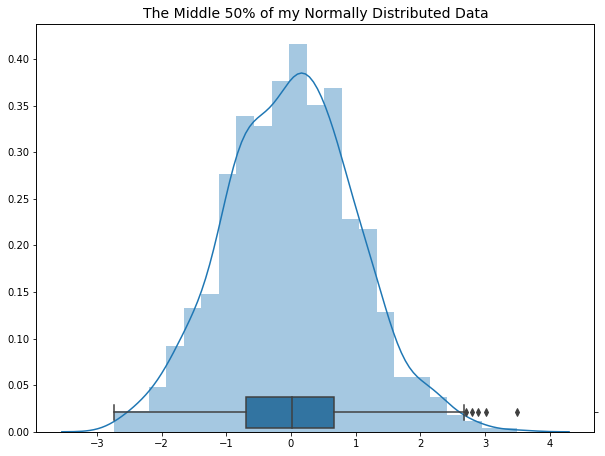

In [70]:
f, ax = plt.subplots(figsize=(10, 7.5))
ax = sns.distplot(norm)
ax.set_title('The Middle 50% of my Normally Distributed Data', fontsize = 14)
ax2 = ax.twinx()
sns.boxplot(x=norm, ax=ax2)
ax2.set(ylim=(-.5, 10));
#https://stackoverflow.com/questions/39200165/seaborn-overlaying-a-box-plot-or-mean-with-error-bars-on-a-histogram

### Distribution and Skew

#### Definitions
- In a left skewed distribution, the bulk of the data values (including the median) lie to the right of the mean, and there is a long tail on the left side. 
- In a right skewed distribution, the bulk of the data values (including the median) lie to the left of the mean, and there is a long tail on the right side. 
- In a symmetric distribution, approximately half of the data values lie to the left of the mean, and approximately half of the data values lie to the right of the mean. So the mean is very close to the median value. 

In a normally distributed set, we would expect the skew to be zero. This is because the mean, median and mode are all equal to each other in the normal distribution. In my randomly generated dataset, I'm getting a result very close to zero;

In [8]:
ss.skew(norm)

0.09181484065999845

This tells us that the distribution of our data is roughly symmetrical. In asymmetric data sets, where the skew is not close to zero, our box plot looks different. Let's generate three data sets, one with so called right-skew, one with left-skew and one with no skew. 

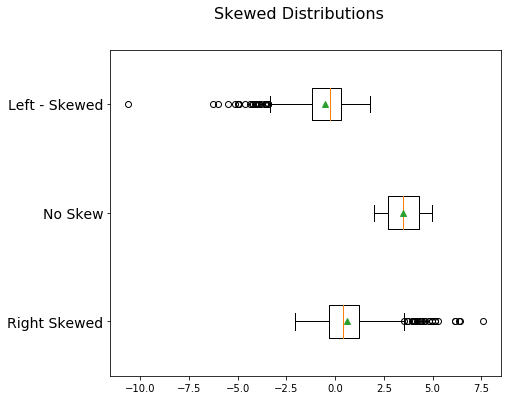

In [52]:
f, axes = plt.subplots(1, sharey = True, figsize=(7, 6))
f.suptitle('Skewed Distributions', fontsize = 16)
#Generating uniform data - no skew
uni = np.random.uniform(5, 2, 1000)
#Generating Gumbel_r data - right skew
r = (ss.gumbel_r.rvs(size=1000))
#Generating Gumbel_r data - left skew
l =(ss.gumbel_l.rvs(size=1000))
data = [r, uni, l]
#Plotting boxplot
plt.boxplot(data, vert = False, showmeans=True)
plt.yticks([1, 2, 3], ['Right Skewed', 'No Skew', 'Left - Skewed'], fontsize=14);

In the boxplots above, I have plotted the mean of all three distributions so the skew is easier to identify. 

In my left skewed dataset, there is an obvious tail of outliers to the left of the Q1. The mean also lies to the left of the median. 

In my uniform dataset, the mean and median are very similar values as expected. There is no tail, and the whiskers appear to have similar lengths. 

In my right skewed dataset, there is an obvious tail of outliers to the right of the Q3. The mean also lies to the right of the median. 

#### Calculating Skew

I will be using the function scipy.stats.skew to calculate the skew for each of the three distributions above. This function:

- Compares the sample distribution with a normal distribution. The larger the value, the larger the distribution differs from a normal distribution.
- A value of zero means there is no skew.
- A large negative value means the distribution is left skewed.
- A large positive value means the distribution is right skewed.

In [10]:
ss.skew(uni)

-0.017959543280366197

In [11]:
ss.skew(r)

1.2555732676285822

In [12]:
ss.skew(l)

-1.2375182384369592

As expected, the uniformly distributed set, returns a value close to zero. While my left skewed distribution gives a negative value and my right skewed data is positive. The variation in skew of these three datasets is not immediately obvious when I plot their distributions on a graph. 

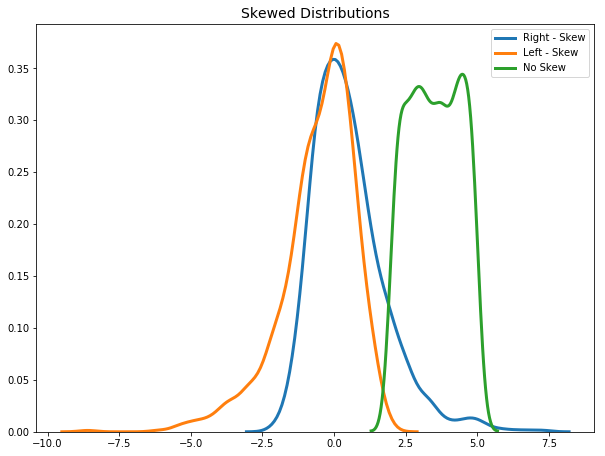

In [13]:
plt.figure(figsize= (10, 7.5))
plt.title('Skewed Distributions', fontsize = 14)
sns.distplot(r, hist = False,  label = 'Right - Skew',
            kde_kws={'linewidth': 3});
sns.distplot(l, hist= False, label = 'Left - Skew',
            kde_kws={'linewidth': 3});
sns.distplot(uni, hist= False, label = 'No Skew',
            kde_kws={'linewidth': 3});

### Comparing Distributions

Box plots are also useful for comparing different variables in a dataset, and can provide insight on changing patterns and correlation.

#### Real World Data

With real world assessment results for a cohort of students, I can use boxplots to compare two sets of assessent results from different years. In this case I will overlay my boxplot with a swarmplot, to get a better indication of the density.

_Note: This data is not based on an actual exam or school results, and any resemblance to same is just a coincidence._

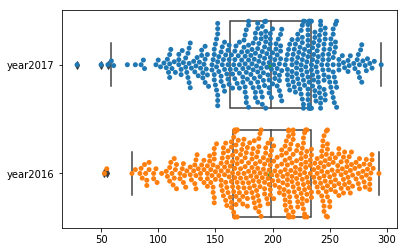

In [53]:
df = pd.read_csv('data/grades.csv')
ax = sns.swarmplot(data=df, orient = 'h')
sns.boxplot(data = df, showmeans=True, orient = 'h', 
            boxprops={'facecolor':'None'}, whiskerprops={'linewidth':0}, 
             ax = ax);
#https://stackoverflow.com/questions/44615759/how-can-box-plot-be-overlaid-on-top-of-swarm-plot-in-seaborn

From looking at the box plots, it's obvious that even though the median and maximum values were similar in both years, there is a much wider range of results in 2017. In 2016, the minimum value appears to be around 75 with outliers identified around 50. In 2017, the minimum mark is much closer to 50, implying that results considered outlier in previous year are not outliers in 2017. In this year outliers range from results of around 25 to 50. 

In [84]:
y17 = df.loc[:, 'year2017']
y16 = df.loc[:, 'year2016']
print('In 2016, there were %.0f students' %(y16.count()))
print('In 2017, there were %.0f students' %(y17.count()))

In 2016, there were 427 students
In 2017, there were 401 students


In [16]:
print('In 2016, the mean was %.3f' %(np.mean(y16)))
print('In 2017, the mean was %.3f' %(np.mean(y17)))

In 2016, the mean was 197.600
In 2017, the mean was 196.586


Now, a lot of different things could have influenced the results here. We don't know the subject or level of this assessment. We don't know if students in both years sat the same exam. But from the data it's obvious that there are students failing this tests, with marks that are definitely lower than in the previous year. It would be up to departmental staff with more detailed information to determine the significance of these results. 

I know that grade results are often normally distributed, but the distribution isn't obvious from the boxplot. We have been given a very clear indication of the spread of data, but the shape of the distribution isn't clear, unless I plot my data again. 

In [90]:
df = df.dropna()
#https://stackoverflow.com/questions/14399689/matplotlib-drawing-lines-between-points-ignoring-missing-data

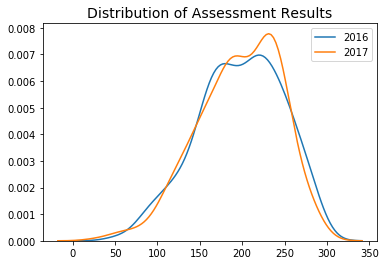

In [117]:
plt.title('Distribution of Assessment Results', fontsize = 14)
ax = sns.distplot(df['year2016'], hist=False, 
                  label = '2016');
sns.distplot(df['year2017'], ax=ax,
             hist=False, label ='2017');
ax.legend()
ax.set_xlabel(None);

Both years are somewhat normally distributed as expected. 

It's also interesting to note that the increase in lower attainment levels in 2017 isn't obvious here, but it was noticeable in our boxplot. 

When we look at variations of boxplots we will see an type of boxplot that does give us an indication of the distribution.

#### Indian Liver Patients Dataset

In [18]:
df2 = pd.read_csv('data/indian-liver-patient.csv')
df2.describe()

,age,total-bil,direct-bil,total-protein,albumin,ag-ratio,sgpt,sgot,alkphos,diagnose
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [19]:
positive = (df2['diagnose']==1)
positive.value_counts(sort=True)

True     416
False    167
Name: diagnose, dtype: int64

In the above dataset, we have data on Indian patients, 416 of whom are liver patients(Diagnosis = 1) and 167 who are not(Diagnosis = 2). Using df.describe() I have been able to identify several test samples where the summary statistics indicate skewed results. I began my investigation by plotting these measues against gender, and differentiating by patient type.

Both measures I plan to look at have extreme outliers for liver patients, so I will disregard those outliers for the intial stage of my investigation. In the plots below, I'm looking at the measures of Albumin and direct Bilirubin in patients.

I am going to plot this data on a notched bar chart to more clearly display any differences in my medians. 

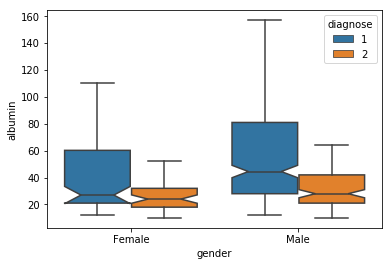

In [59]:
sns.boxplot(x = 'gender', y='albumin', hue = 'diagnose', data = df2, 
            showfliers=False, notch = True);

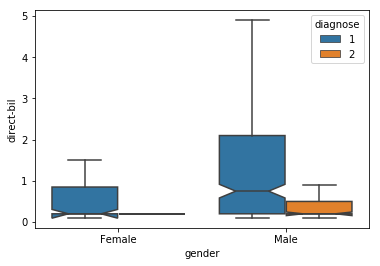

In [60]:
sns.boxplot(x = 'gender', y='direct-bil', hue = 'diagnose', data = df2, 
            showfliers=False, notch = True);

Both measues are noticeably higher in patients who are liver patients, and the results for male patients are much higher than the results in female patients. This could imply that more men than women are treated as liver patients. If I compare the genders of liver patients that does appear to be the case.

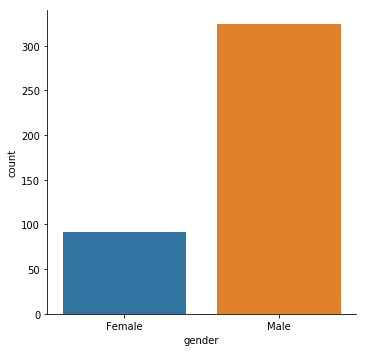

In [215]:
positive = df2.loc[df2['diagnose'] ==(1)]
sns.catplot(x = 'gender', data = positive, kind = 'count');

### Variations

I have already used two variations of boxplots in this notebook. A swarmplot, plots datapoints over my boxplot to give a better indication of the distribution. A notched box plot makes differences in median more easiy identifiable. Neither of these plots change the summary statistics to be displayed. 

Graphical representations of data are only useful when they can be read correctly. This makes the widespread adoption of new types of plot difficult. 

Variations in box plots have muddied the waters slightly with some of them displaying summary statistics other than the ones Tukey originally envisioned. They can be useful, but should be approached with caution. Any variation needs to clearly describe the statistics it represents, unless commonly known, or you risk your audience misinterpreting the data.

#### Violin Plot

One very useful variation is the Violin Plot. This plot combines a boxplot with its probability distribution function. Box plots are very useful for comparing the spread of data, but it's often difficult to distinguish the shape of the distribution from a box plot alone.

Let's examine my normal distribution again, to see how a violin plot illustrates that data.  

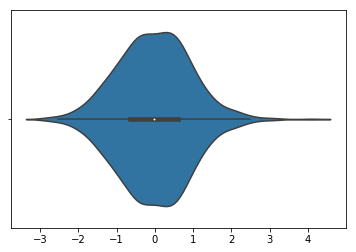

In [216]:
sns.violinplot(norm);


- The yellow point in the centre is my median. 
- The IQR is represented by the black box in the centre of my violin plot. 
- The 95% Confidence Interval is represented by the black line extending from the box. 
- On each side of the line there is an estimation of the probabiity density function. Notice how above the line, I have a genereally symmetrical curve that does approximate the normal distribution. Below the curve I have a mirror image of the same distribution.
- The end points of my shape are the Maximum and Minimum values in my dataset. 

I prefer the Seaborn Violin Plot to other options because it illustrates these summary statistics. In comparison, the default Matplotlib Violin Plot only displays the max, min, median and kernel density function. Although with a less mathematically inclined audience, the Matplotlib plot may be preferable.

I am going to plot the four randomly generated data sets I've already encountered in this notebook, as well as generating a fifth binomial distribution, to show how a Violin Plot represents this data.

In [217]:
bino = np.random.binomial(8, 0.6, 1000)
new_data = [norm, bino, uni, r, l]

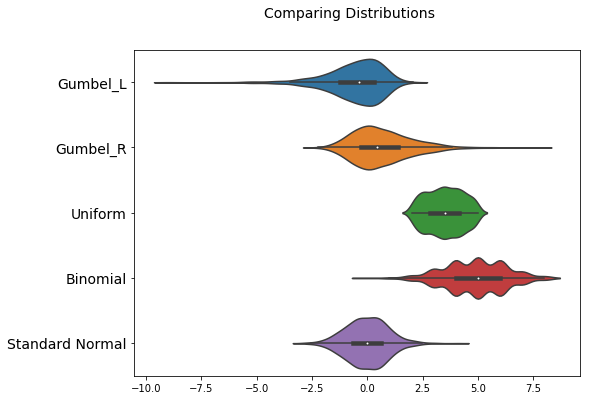

In [218]:
fig = plt.figure(figsize = (8,6))
fig.suptitle('Comparing Distributions', fontsize=14)

new_data=pd.DataFrame(new_data)

sns.violinplot(data=[new_data.loc[4], 
                  new_data.loc[3], 
                  new_data.loc[2], 
                  new_data.loc[1], 
                  new_data.loc[0]], orient='h');

plt.yticks([4, 3, 2, 1, 0], ['Standard Normal', 'Binomial', 'Uniform', 'Gumbel_R', 'Gumbel_L'], fontsize=14);

My left and right skewed data still have noticeable tails, that clearly show the skew of my data sets.

The Uniform and Standard Normal violin plots clearly display the differences in the distribution of these data sets. If I only used a box plot to illustrate these sets they would appear quite similar; they are both roughly symmetrical with almost zero skew. In a violin plot, the Standard Normal has a peaked curve, while the Uniform Distribution is more rectangular shaped as we'd expect. 

My binomial distribution is multi modal. That means it's got more than one mode, or more than one peak in it's distribution curve. This wouldn't be obvious in a boxplot, but in a violin plot, it's clear to see that the distribution has multiple peaks.

Unfortunately Violin plots are not as well known as box plots. This means that they may be considered difficult to read by viewers unfamiliar with their definition.

### References

* Hadley Wickham and Lisa Stryjewski. [40 years of boxplots](http://vita.had.co.nz/papers/boxplots.pdf), November 29, 2011.


* [Boxplot, Seaborn Documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
* [Boxplot, Mathplotlib Documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
* [Understanding Boxplots, on TowardsDataScience.com](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)


* [Box plot, Wikipedia page](https://en.wikipedia.org/wiki/Box_plot)
* [John Tukey, Wikipedia page](https://en.wikipedia.org/wiki/John_Tukey)
* [Shapes of distributions, Penn State Eberly College of Science](https://onlinecourses.science.psu.edu/stat414/node/187/)
* [Violin plot, Wikipedia page](https://en.wikipedia.org/wiki/Violin_plot)
* [Violin Plot examples on blog.modeanalytics](https://blog.modeanalytics.com/violin-plot-examples/)